## Import libraries

In [15]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set random seed
seed = 42

## Data Section

In [3]:
# Load in the data
df = pd.read_csv("wine_quality.csv")

# display the dataset
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Split into train and test sections
y = df.pop("quality")
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=seed)

## Model Training

In [6]:
# Fit a model on the train section
model = RandomForestRegressor(max_depth=2, random_state=seed)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [8]:
# Report training set score
train_score = model.score(X_train, y_train) * 100
# Report test set score
test_score = model.score(X_test, y_test) * 100

train_score, test_score

(32.989576660267005, 32.03532587187918)

In [9]:
# Write scores to a file
with open("metrics.txt", 'w') as file:
        file.write(f"Training variance explained: {train_score:.2f}\n)
        file.write(f"Test variance explained: {test_score:.2f}\n")

In [10]:
# read scores
with open("metrics.txt", 'r') as file:
        print(file.readlines())

['Training variance explained: 32.99\n', 'Test variance explained: 32.04\n']


## feature importance Section

In [11]:
importances = model.feature_importances_
labels = df.columns
feature_df = pd.DataFrame(list(zip(labels, importances)), columns = ["feature","importance"])
feature_df = feature_df.sort_values(by='importance', ascending=False,)

In [12]:
feature_df

,feature,importance
10,alcohol,0.644244
9,sulphates,0.281100
1,volatile acidity,0.065810
2,citric acid,0.006156
0,fixed acidity,0.002216
8,pH,0.000474
3,residual sugar,0.000000
4,chlorides,0.000000
5,free sulfur dioxide,0.000000
6,total sulfur dioxide,0.000000


In [13]:
# image formatting
axis_fs = 18 #fontsize
title_fs = 22 #fontsize
sns.set(style="whitegrid")

ax = sns.barplot(x="importance", y="feature", data=feature_df)
ax.set_xlabel('Importance',fontsize = axis_fs) 
ax.set_ylabel('Feature', fontsize = axis_fs)#ylabel
ax.set_title('Random forest\nfeature importance', fontsize = title_fs)

plt.tight_layout()
plt.savefig("feature_importance.png",dpi=120) 
plt.close()

## Plot Residuals

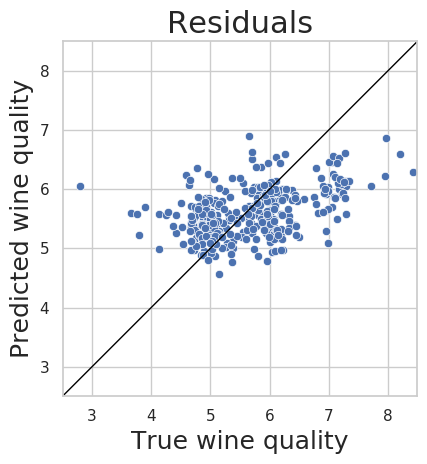

In [14]:
y_pred = model.predict(X_test) + np.random.normal(0,0.25,len(y_test))
y_jitter = y_test + np.random.normal(0,0.25,len(y_test))
res_df = pd.DataFrame(list(zip(y_jitter,y_pred)), columns = ["true","pred"])

ax = sns.scatterplot(x="true", y="pred",data=res_df)
ax.set_aspect('equal')
ax.set_xlabel('True wine quality',fontsize = axis_fs) 
ax.set_ylabel('Predicted wine quality', fontsize = axis_fs)#ylabel
ax.set_title('Residuals', fontsize = title_fs)

# Make it pretty- square aspect ratio
ax.plot([1, 10], [1, 10], 'black', linewidth=1)
plt.ylim((2.5,8.5))
plt.xlim((2.5,8.5))

plt.tight_layout()
plt.savefig("residuals.png",dpi=120) 